Importowanie

In [30]:
import xarray as xr
import os
import numpy as np
from PIL import Image

Pobieranie i konwersja danych

In [31]:
file_path = "soil_example.nc"
ds = xr.open_dataset(file_path)
df = ds.to_dataframe()

Deklaracja istotnych stałych
(DIST = 1.0 znaczy że skrawek ma 1.0 dlugości na 1.0 szerokości geograficznej)


In [32]:
DIST = 1
EPS = 0.005

Wyciąganie fragmentu danych

In [33]:
def get_chunk(lon, lat, eps, cat):
    df_s = df.loc[(df[cat].notnull()) &
    (lon-eps<df.longitude) & (df.longitude<lon+eps) &
    (lat-eps<df.latitude) & (df.latitude<lat+eps)]
    if df_s.size==0:
        return get_chunk(lon, lat, eps+EPS, cat)
    else:
        return df_s

Liczenie średniej wartości w punkcie

In [34]:
def find_mean(lon, lat, eps, cat):
    df_s = get_chunk(lon, lat, eps, cat)[cat]
    return df_s.mean()


Generowanie macierzy do szachownicy

In [35]:
def make_grid(lon_start, lat_start, grid_size, cat):

    grid = np.zeros((grid_size, grid_size))
    jump = DIST/grid_size 
    for ir in range(grid_size):
        lon = lon_start+ir*jump
        for ic in range(grid_size):
            lat = lat_start + ic*jump
            val = find_mean(lon, lat, jump, cat)
            grid[ic][grid_size-ir-1]=val
    grid.resize((grid_size, grid_size))
    grid = grid.T
    return grid

Rzutowanie na skalę szarości

In [36]:
def grayscale(grid):
    grid -= grid.min()
    grid *= 255.0/(grid.max())
    im = Image.fromarray(grid)
    return im

Wyciąganie wielkiego fragmentu danych

In [37]:
def get_big_chunk(lon_start, lat_start, eps, cat):
    df_s = df.loc[(df[cat].notnull()) &
    (lon_start-eps<df.longitude) & (df.longitude<lon_start+eps+DIST) &
    (lat_start-eps<df.latitude) & (df.latitude<lat_start+eps+DIST)]
    return df_s

Rysowanie wykresu

In [38]:
def plot_big_chunk(lon, lat, eps, cat):
    df_s = get_big_chunk(lon, lat, eps, cat)
    df_s.plot.scatter(x="latitude", y="longitude",
    c=cat, colormap="viridis")

Przykład:

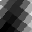

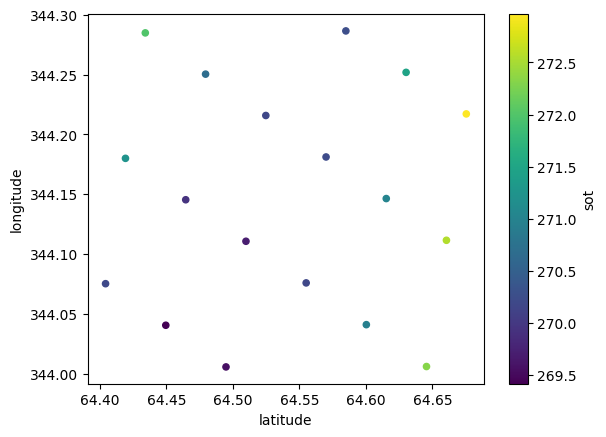

In [39]:
LON = 344
LAT = 64.4
gSize=32
plot_big_chunk(LON, LAT, EPS, "sot")
grid = make_grid(LON, LAT, gSize, "sot")
im = grayscale(grid)
im.show()
